## RAIN FOREST - FLIGHT PREDICTION

Loading the Libraries

In [60]:
import numpy as npa
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error as MSE
from sklearn.metrics import mean_absolute_error as MAE

In [6]:
pip install openpyxl

Note: you may need to restart the kernel to use updated packages.


In [ ]:
# OPEN THE EXCEL FILES CONVERT INTO CSV 
raw = pd.read_excel('Data_Train.xlsx')
raw.to_csv('train.csv')

#raw_test = pd.read_excel("Test_set.xlsx")
#raw_test.to_csv('test.csv')

Load the csv file

In [ ]:
df_train = pd.read_csv('train.csv')
#df_test = pd.read_csv('test.csv')

In [9]:
df_train.shape, df_test.shape

((10683, 12), (2671, 11))

EDA (EXPLORATORY DATA ANALYSIS)

In [10]:
pd.set_option('display.max_columns', None)

In [11]:
df_train.head(2)

,Unnamed: 0,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662


In [18]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Unnamed: 0       10683 non-null  int64 
 1   Airline          10683 non-null  object
 2   Date_of_Journey  10683 non-null  object
 3   Source           10683 non-null  object
 4   Destination      10683 non-null  object
 5   Route            10682 non-null  object
 6   Dep_Time         10683 non-null  object
 7   Arrival_Time     10683 non-null  object
 8   Duration         10683 non-null  object
 9   Total_Stops      10682 non-null  object
 10  Additional_Info  10683 non-null  object
 11  Price            10683 non-null  int64 
dtypes: int64(2), object(10)
memory usage: 1001.7+ KB


In [20]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2671 entries, 0 to 2670
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Unnamed: 0       2671 non-null   int64 
 1   Airline          2671 non-null   object
 2   Date_of_Journey  2671 non-null   object
 3   Source           2671 non-null   object
 4   Destination      2671 non-null   object
 5   Route            2671 non-null   object
 6   Dep_Time         2671 non-null   object
 7   Arrival_Time     2671 non-null   object
 8   Duration         2671 non-null   object
 9   Total_Stops      2671 non-null   object
 10  Additional_Info  2671 non-null   object
dtypes: int64(1), object(10)
memory usage: 229.7+ KB


In [19]:
df_train = df_train.drop('Unnamed: 0', axis=1)

In [21]:
df_test = df_test.drop('Unnamed: 0', axis=1)

In [22]:
# CHECK THE DATA FRAME COLUMNS
df_train.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

In [23]:
cat = [i for i in df_train.columns if df_train[i].dtype == object]
num = [i for i in df_train.columns if df_train[i].dtype != object]

In [24]:
cat

['Airline',
 'Date_of_Journey',
 'Source',
 'Destination',
 'Route',
 'Dep_Time',
 'Arrival_Time',
 'Duration',
 'Total_Stops',
 'Additional_Info']

In [25]:
num

['Price']

In [26]:
df_train['Date_of_Journey'].dtype

dtype('O')

In [ ]:
# returns a NumPy array containing the number of missing (NaN) values for each column in the df_train DataFrame.
df_train.isnull().sum().to_numpy()

array([0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0])

In [ ]:
#Drops all rows in df_train that contain any missing (NaN) values.
#inplace=True means the changes are made directly to the original DataFrame, and no new object is returned.
df_train.dropna(inplace=True)

In [31]:
df_train['Date_of_Journey'] = pd.to_datetime(df_train['Date_of_Journey'], dayfirst=True)
df_test['Date_of_Journey'] = pd.to_datetime(df_test['Date_of_Journey'], dayfirst=True)

In [32]:
df_train.dropna(inplace=True)

In [33]:
df_train['Day'] = df_train['Date_of_Journey'].dt.day
df_train['Month'] = df_train['Date_of_Journey'].dt.month
df_train['Year'] = df_train['Date_of_Journey'].dt.year

In [34]:
df_train.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Day,Month,Year
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,2019
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5,2019


In [35]:
# after making additional features from datetime, now we remove the datetime feature 
df_train.drop('Date_of_Journey', axis=1, inplace=True)

In [40]:
# Strip column names of unwanted spaces
df_train.columns = df_train.columns.str.strip()

# Try again
df_train['Year'].value_counts()

Year
2019    10682
Name: count, dtype: int64

In [42]:
df_train['Dep_Time'] = pd.to_datetime(df_train['Dep_Time'])

In [43]:
df_train['Hour of Departure'] = df_train['Dep_Time'].dt.hour
df_train['Minute of Departure'] = df_train['Dep_Time'].dt.minute

In [45]:
# dropping original departure time feature
df_train.drop('Dep_Time', axis=1, inplace=True)

In [46]:
df_train.head(3)

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Day,Month,Year,Hour of Departure,Minute of Departure
0,IndiGo,Banglore,New Delhi,BLR → DEL,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,2019,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,13:15,7h 25m,2 stops,No info,7662,1,5,2019,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,04:25 10 Jun,19h,2 stops,No info,13882,9,6,2019,9,25


In [49]:
df_train['Arrival_Time'] = pd.to_datetime(df_train['Arrival_Time'])

In [50]:
df_train['Arrival Hour'] = df_train.Arrival_Time.dt.hour
df_train['Arrival Minute'] = df_train.Arrival_Time.dt.minute

In [51]:
df_train.drop('Arrival_Time', axis=1, inplace=True)

In [52]:
df_train.head(3)

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Day,Month,Year,Hour of Departure,Minute of Departure,Arrival Hour,Arrival Minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,2019,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,2019,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,9,6,2019,9,25,4,25


In [53]:
## FUNCTION
duration = list(df_train['Duration'])
for i in range(len(duration)):
    if len(duration[i].split()) != 2:
        if 'h' in duration[i]:
            duration[i] = duration[i].strip() + ' 0m'
        else:
            duration[i] = "0h " + duration[i]

duration_hrs = []
duration_mins = []

for i in range(len(duration)):
    duration_hrs.append(int(duration[i].split(sep='h')[0]))
    duration_mins.append(int(duration[i].split(sep='m')[0].split()[-1])) 

In [54]:
df_train['Duration Hours'] = duration_hrs
df_train['Duration Mins'] = duration_mins

In [55]:
df_train.drop('Duration', axis=1, inplace=True)

In [56]:
df_train.head(3)

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Day,Month,Year,Hour of Departure,Minute of Departure,Arrival Hour,Arrival Minute,Duration Hours,Duration Mins
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,2019,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,1,5,2019,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,9,6,2019,9,25,4,25,19,0


In [57]:
df_train['Total_Stops'].value_counts()

Total_Stops
1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: count, dtype: int64

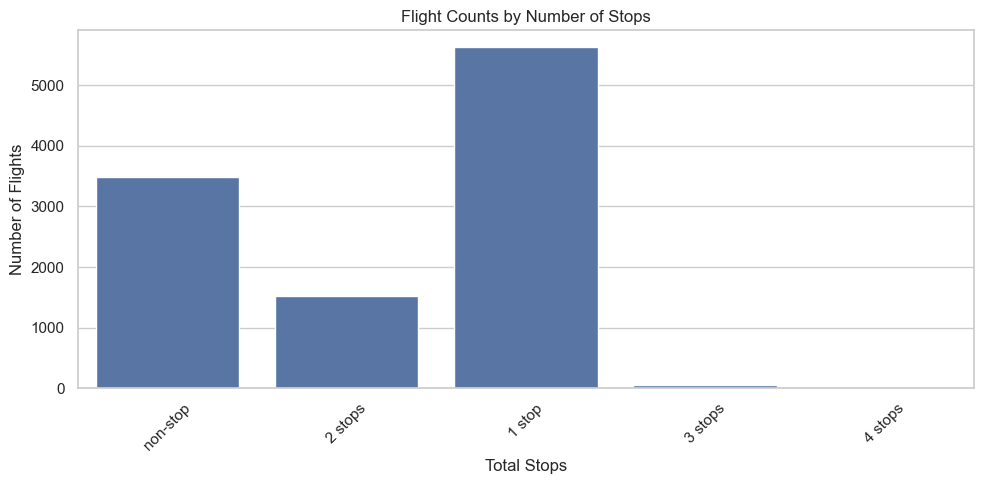

In [61]:
plt.figure(figsize=(10, 5))  # Set figure size using matplotlib
sns.set_theme(style="whitegrid")  # Optional: set Seaborn theme

sns.countplot(x='Total_Stops', data=df_train)
plt.title("Flight Counts by Number of Stops")
plt.xlabel("Total Stops")
plt.ylabel("Number of Flights")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

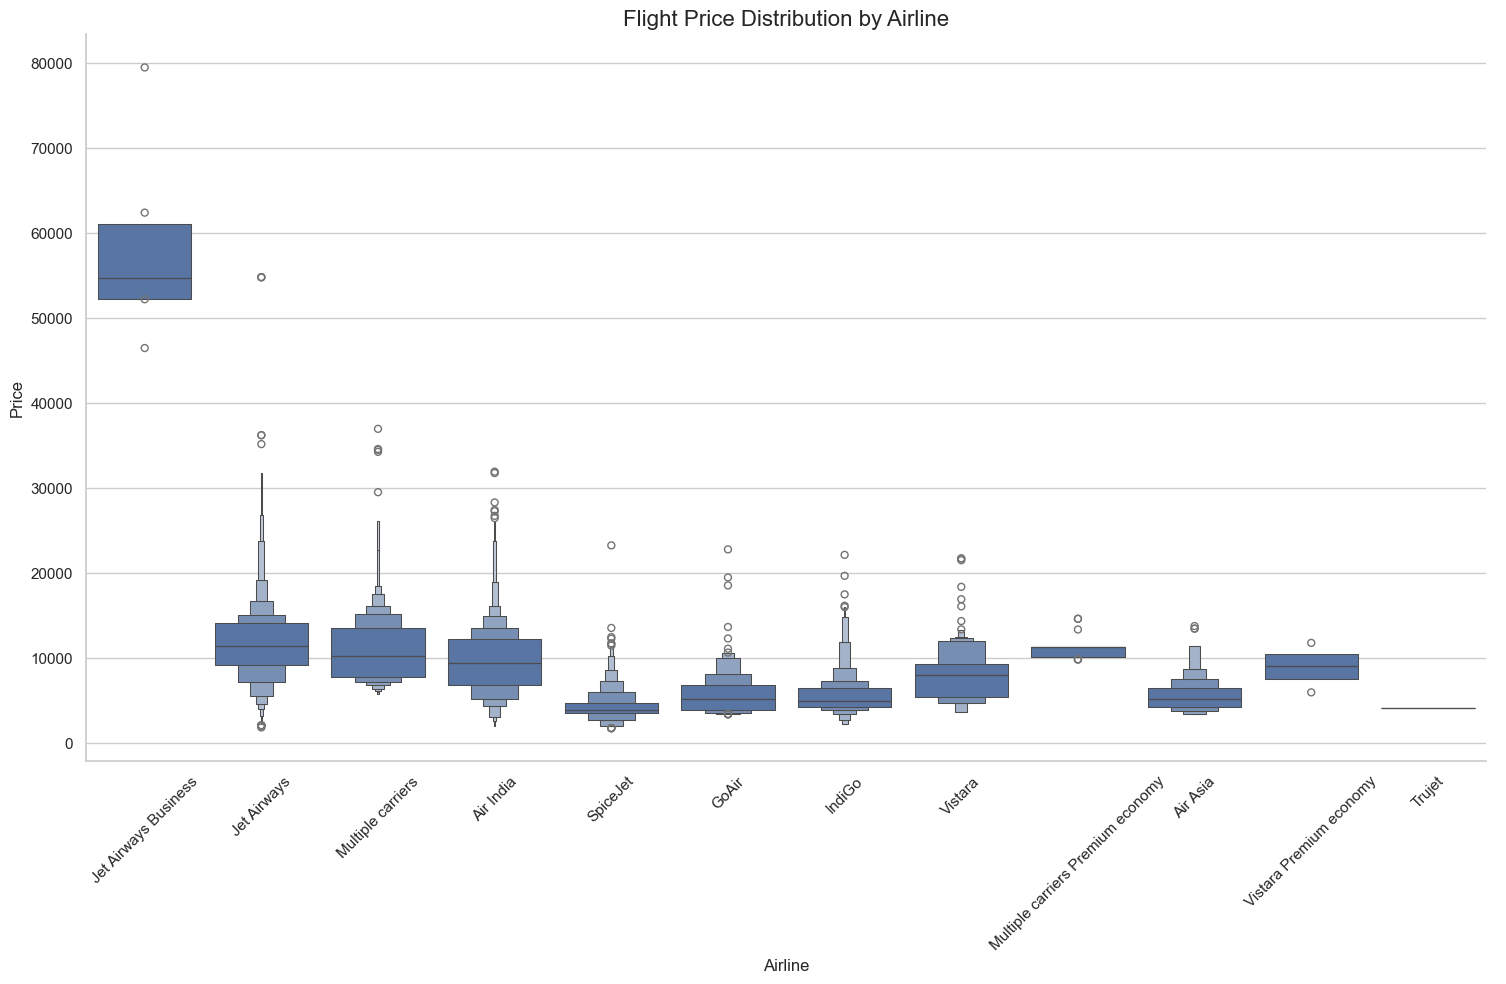

In [62]:
# Set Seaborn theme (optional)
sns.set_theme(style="whitegrid")

# Use catplot directly with height and aspect for sizing
sns.catplot(
    y='Price',
    x='Airline',
    data=df_train.sort_values("Price", ascending=False),
    kind='boxen',
    height=10,       # Total height in inches
    aspect=1.5       # Width = height * aspect (here: 15 inches)
)

plt.xticks(rotation=45)
plt.title("Flight Price Distribution by Airline", fontsize=16)
plt.tight_layout()
plt.show()

In [63]:
airline_names = df_train[['Airline']]
airline_names = pd.get_dummies(airline_names, drop_first=True)

In [64]:
airline_names.head(3)

,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy
0,False,False,True,False,False,False,False,False,False,False,False
1,True,False,False,False,False,False,False,False,False,False,False
2,False,False,False,True,False,False,False,False,False,False,False


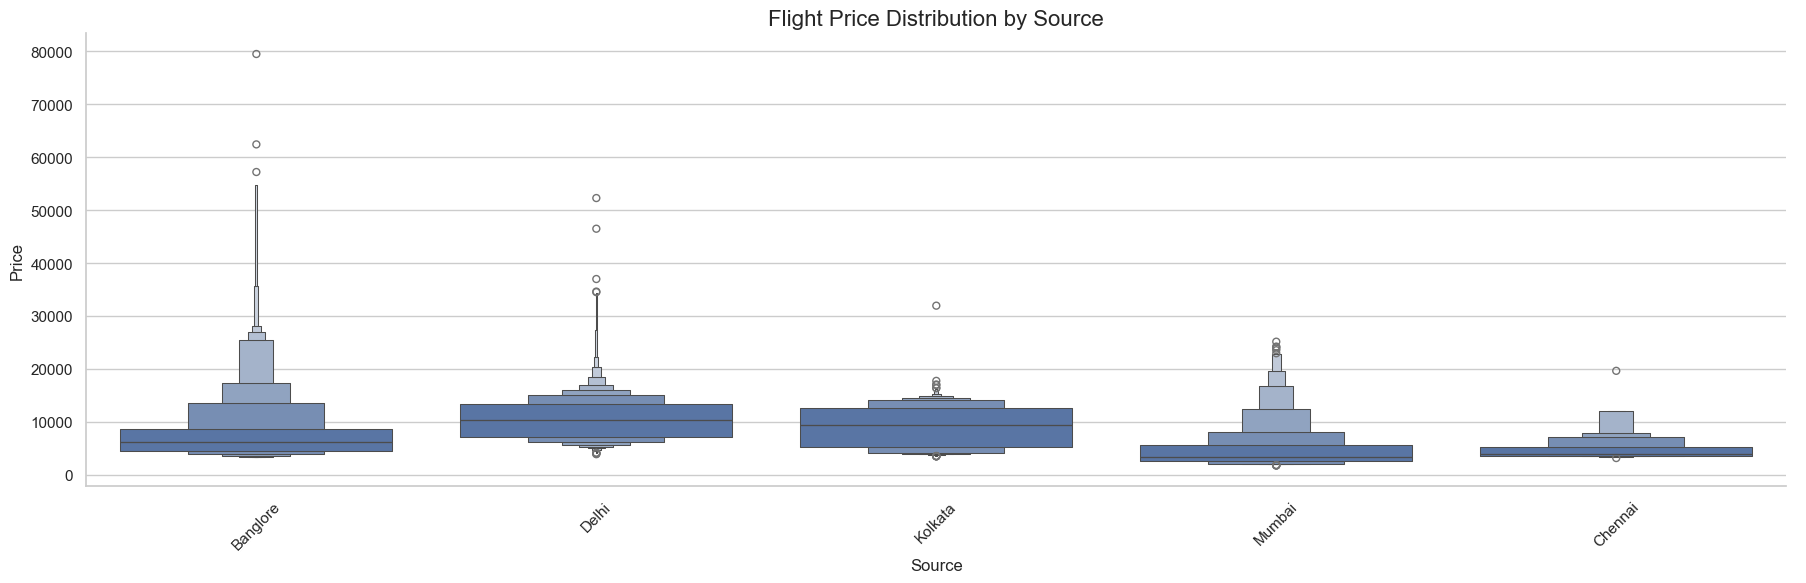

In [65]:
# Optional: Apply a clean Seaborn style
sns.set_theme(style="whitegrid")

# Boxen plot of Price by Source
g = sns.catplot(
    y='Price',
    x='Source',
    data=df_train.sort_values("Price", ascending=False),
    kind='boxen',
    height=6,
    aspect=3
)

# Improve plot readability
plt.title("Flight Price Distribution by Source", fontsize=16)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Converting Source to One-hot Encoded Vectors

In [66]:
df_train['Source'].value_counts()

Source
Delhi       4536
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: count, dtype: int64

In [68]:
source = df_train[['Source']]
source = pd.get_dummies(source)
source.head(4)

,Source_Banglore,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai
0,True,False,False,False,False
1,False,False,False,True,False
2,False,False,True,False,False
3,False,False,False,True,False


Converting Destination to One-hot Encoded Vectors

In [69]:
df_train['Destination'].value_counts()

Destination
Cochin       4536
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: count, dtype: int64

In [71]:
destination = df_train[['Destination']]
destination = pd.get_dummies(destination)
destination.head(3)

,Destination_Banglore,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,False,False,False,False,False,True
1,True,False,False,False,False,False
2,False,True,False,False,False,False


In [72]:
destination.shape

(10682, 6)

In [73]:
df_train.drop(['Route', 'Additional_Info'], axis=1, inplace=True)

In [74]:
df_train.head(3)

,Airline,Source,Destination,Total_Stops,Price,Day,Month,Year,Hour of Departure,Minute of Departure,Arrival Hour,Arrival Minute,Duration Hours,Duration Mins
0,IndiGo,Banglore,New Delhi,non-stop,3897,24,3,2019,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,2 stops,7662,1,5,2019,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,2 stops,13882,9,6,2019,9,25,4,25,19,0


In [77]:
df_train['Total_Stops'] = df_train['Total_Stops'].map({'non-stop': 0, '2 stops': 2, '1 stop': 1, '3 stops': 3, '4 stops': 4})

In [78]:
df_train.drop(['Airline', 'Source', 'Destination'], axis=1, inplace=True)

In [79]:
df_train.head(3)

,Total_Stops,Price,Day,Month,Year,Hour of Departure,Minute of Departure,Arrival Hour,Arrival Minute,Duration Hours,Duration Mins
0,NaN,3897,24,3,2019,22,20,1,10,2,50
1,NaN,7662,1,5,2019,5,50,13,15,7,25
2,NaN,13882,9,6,2019,9,25,4,25,19,0


In [80]:
# merge all dataframes in a single dataframe
train_data = pd.concat([df_train, airline_names, source, destination], axis=1)

In [81]:
train_data.head(3)

,Total_Stops,Price,Day,Month,Year,Hour of Departure,Minute of Departure,Arrival Hour,Arrival Minute,Duration Hours,Duration Mins,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Banglore,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Banglore,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,NaN,3897,24,3,2019,22,20,1,10,2,50,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True
1,NaN,7662,1,5,2019,5,50,13,15,7,25,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False
2,NaN,13882,9,6,2019,9,25,4,25,19,0,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False


In [82]:
train_data.shape

(10682, 33)

## RAIN FOREST - MODEL PREDICTION

In [83]:
X = train_data.drop('Price', axis=1)
Y = train_data['Price']

In [84]:
X.shape, Y.shape

((10682, 32), (10682,))

In [85]:
X_train, X_val, Y_train, Y_val = train_test_split(X, 
                                                  Y, 
                                                  test_size=0.2, 
                                                  random_state=123)

print(X_train.shape)
print(X_val.shape)
print(Y_train.shape)
print(Y_val.shape)

(8545, 32)
(2137, 32)
(8545,)
(2137,)


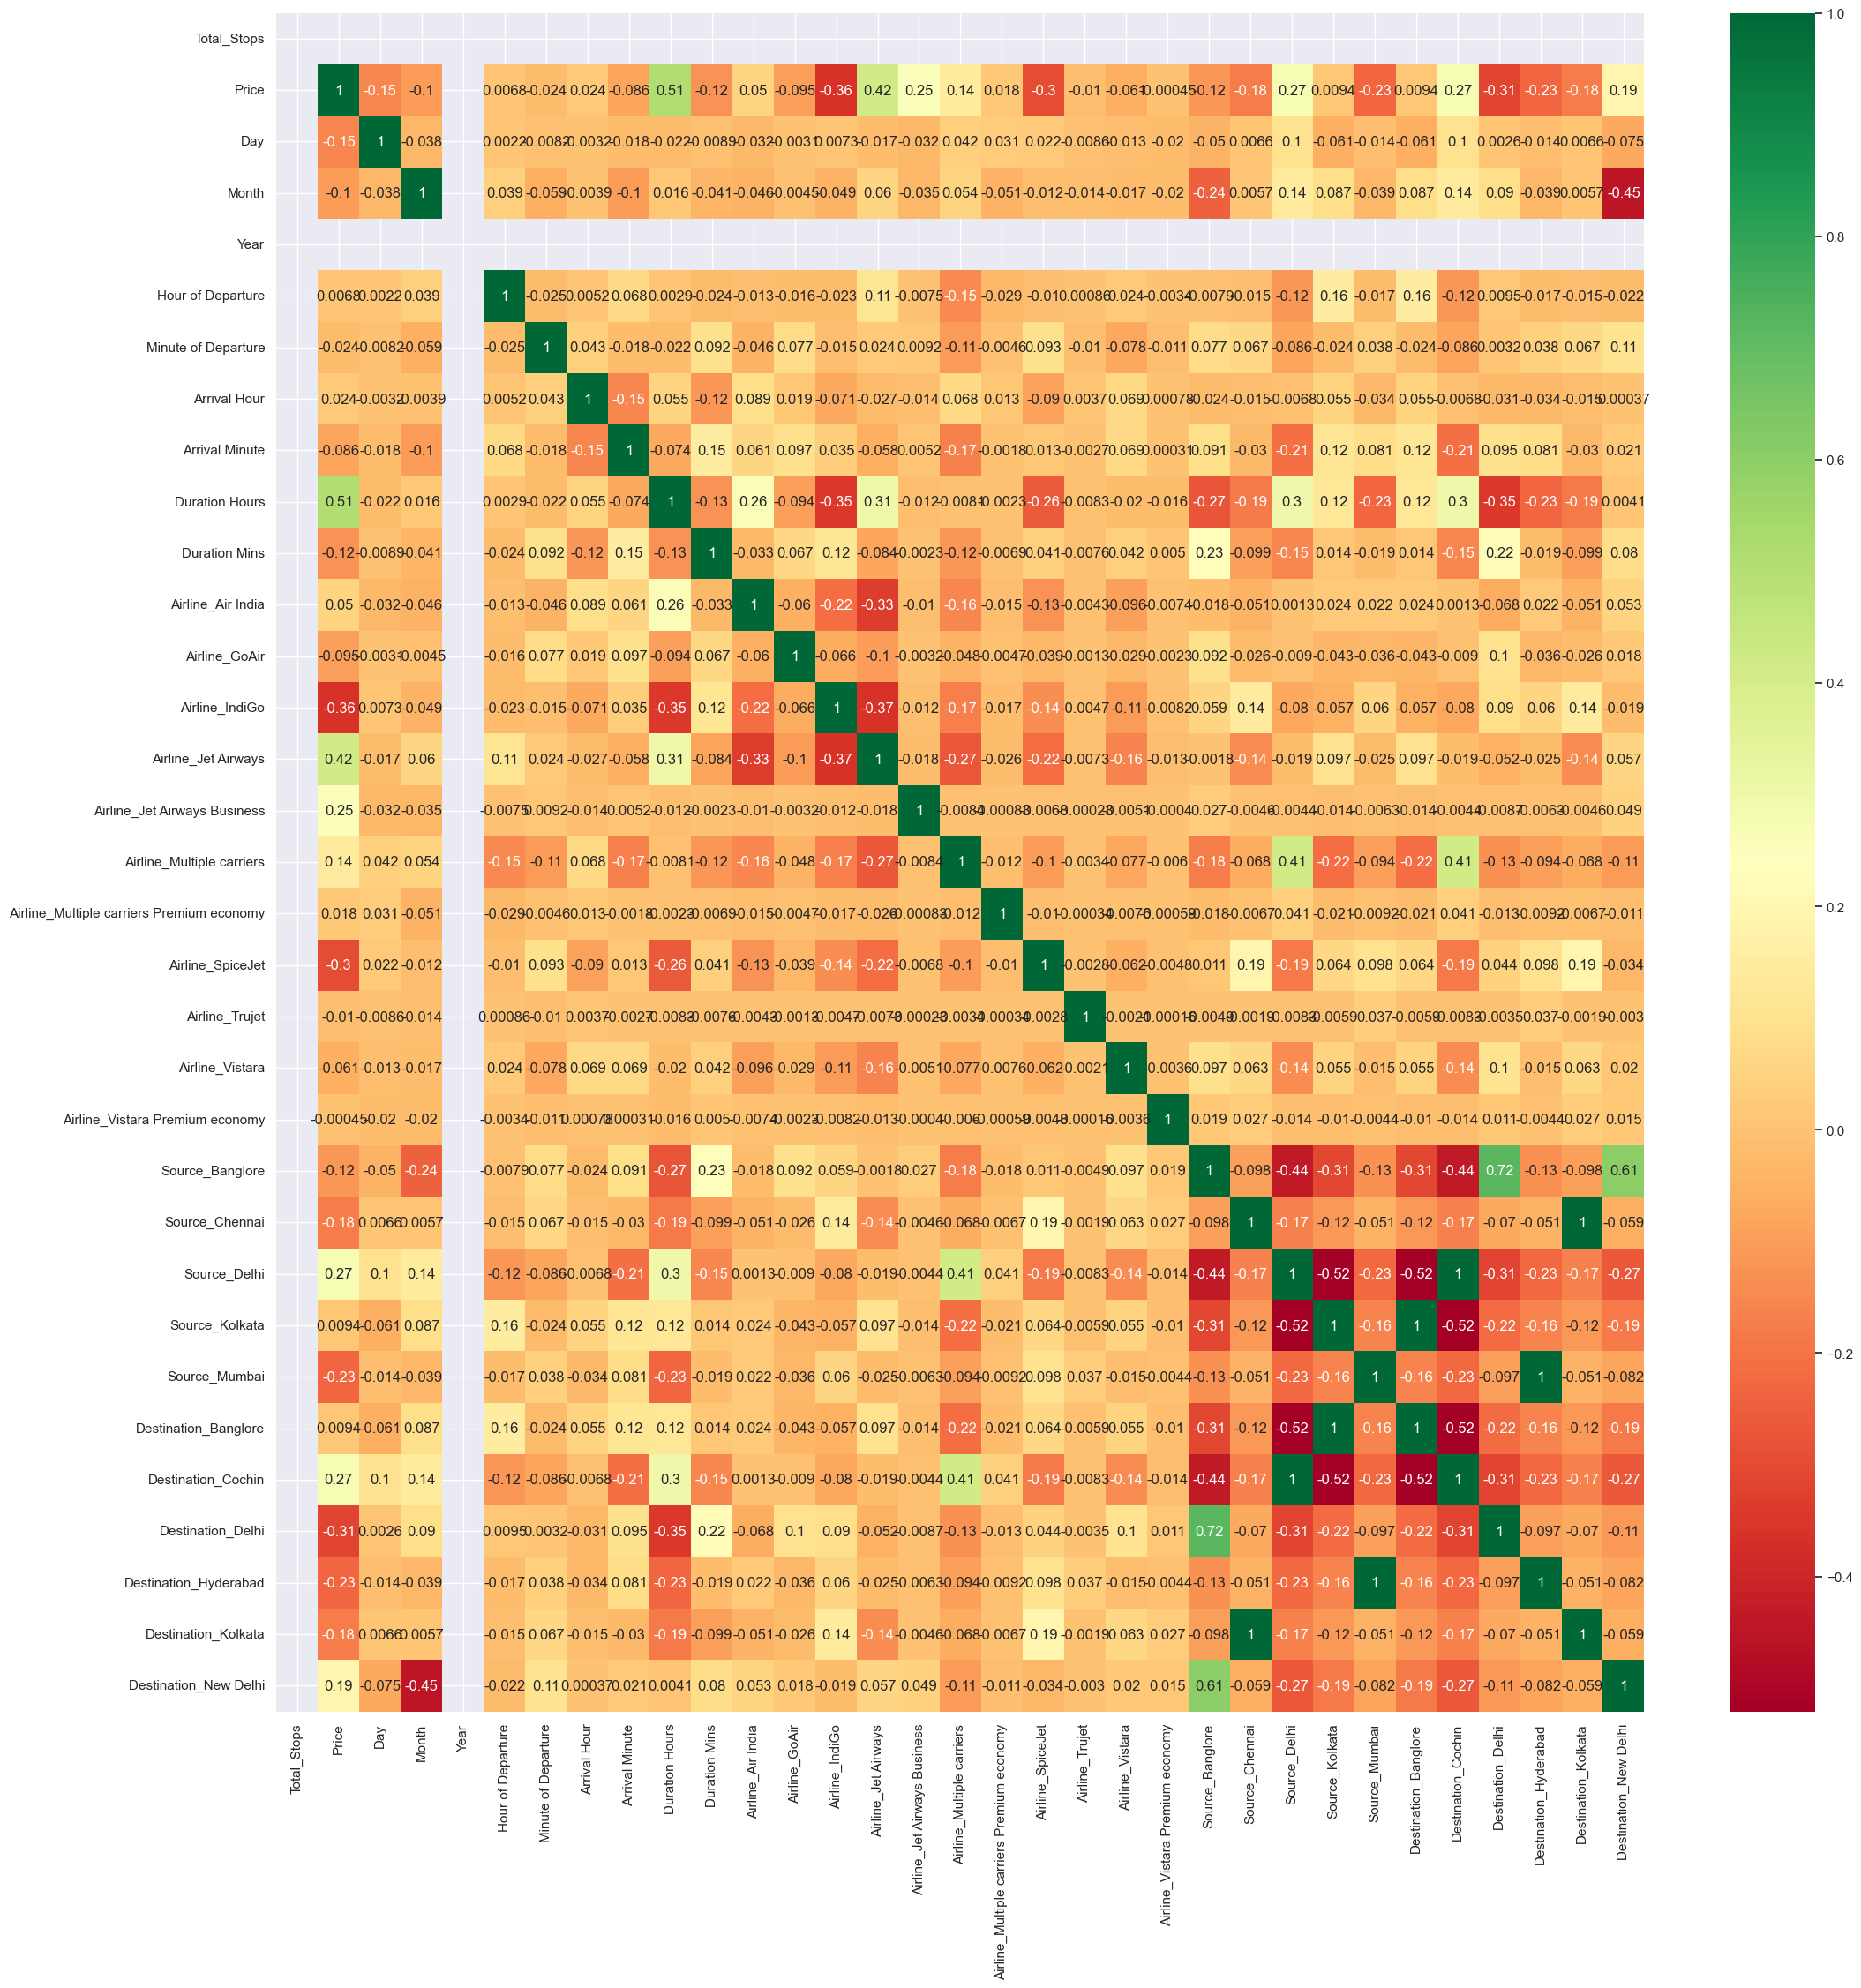

In [86]:
# plt.figure(figsize=(20, 20))
sns.set(rc={'figure.figsize':(25, 25)})
sns.heatmap(train_data.corr(),
           annot=True, cmap='RdYlGn')
plt.show()

Random Forest - Regression Model 

In [87]:
%%time
rf = RandomForestRegressor()
rf.fit(X, Y)

CPU times: total: 2.42 s
Wall time: 2.51 s


,n_estimators,100
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [88]:
rf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 1.0,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

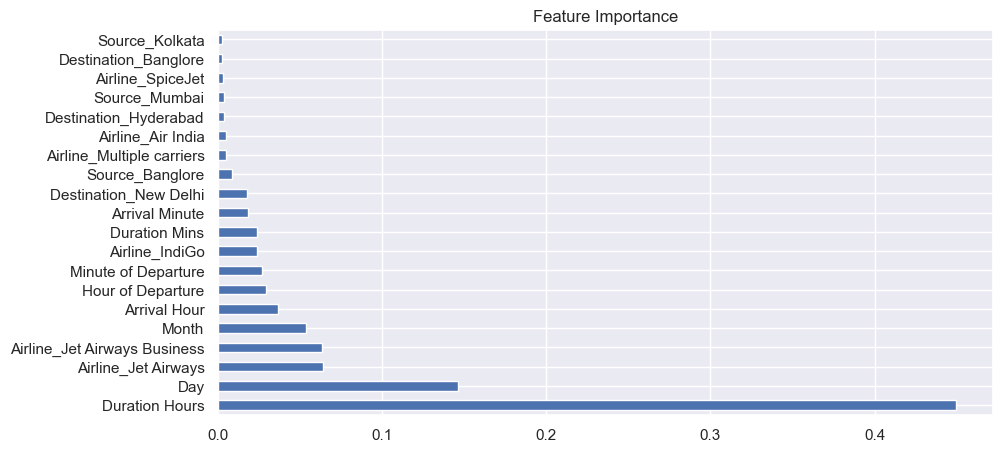

In [89]:
plt.figure(figsize=(10, 5))
plt.title('Feature Importance')
imp = pd.Series(rf.feature_importances_, index=X.columns)
imp.nlargest(20).plot(kind='barh')
plt.show()

In [90]:
print('Accuracy of RF on train: %.4f' % rf.score(X_train, Y_train))
print('Accuracy of RF on validation: %.4f' % rf.score(X_val, Y_val))

Accuracy of RF on train: 0.9474
Accuracy of RF on validation: 0.9507


In [91]:
y_pred = rf.predict(X_val)

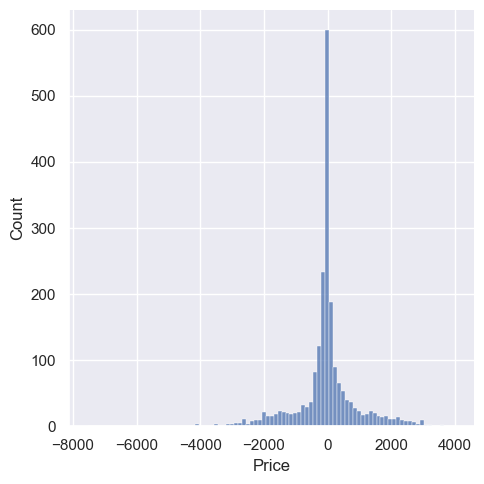

In [92]:
sns.displot(Y_val-y_pred)

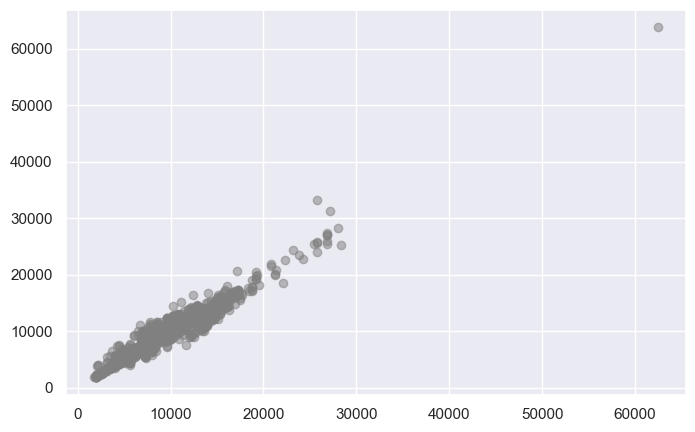

In [93]:
plt.figure(figsize=(8, 5))
plt.scatter(Y_val, y_pred, alpha=0.5, color='grey')

In [94]:
import math

def show_eror():
    print('Mean Squared Error: %.3f' % MSE(Y_val, y_pred))
    print('Mean Absolute Error: %.3f' % MAE(Y_val, y_pred))
    print('Root Meab Squared Error: %.3f' % math.sqrt(MSE(Y_val, y_pred)))
    print('Root Meab Squared Error: %.3f' % math.sqrt(MAE(Y_val, y_pred)))

In [95]:
show_eror()

Mean Squared Error: 949912.649
Mean Absolute Error: 576.313
Root Meab Squared Error: 974.635
Root Meab Squared Error: 24.007


SAVING THE MODEL

In [96]:
import pickle
from pickle import load

In [101]:
file = open('flight.pkl', 'wb')
pickle.dump(rf, file)

In [102]:
model = open('flight.pkl', 'rb')
rf_model = load(model)

In [103]:
rf_model

,n_estimators,100
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [104]:
prediction = rf_model.predict(X_val)

In [105]:
prediction

array([ 8831.32      , 16279.93733333, 12633.34666667, ...,
        3665.61      ,  5968.55      , 11127.987     ], shape=(2137,))

In [106]:
Y_val_ = Y_val.to_numpy()

Showing the Predictions Made by Mode

In [107]:
df = pd.DataFrame({'Actual Price': Y_val, 'Predicted Price': y_pred})
df.head(10)

,Actual Price,Predicted Price
10435,8996,8831.320000
8619,15400,16279.937333
6445,10844,12633.346667
3159,4423,4231.460000
9866,13339,10801.937500
4680,17234,16766.522167
9981,9627,9713.100000
3238,11507,12470.073000
8315,9237,8947.415000
462,4957,4995.430000


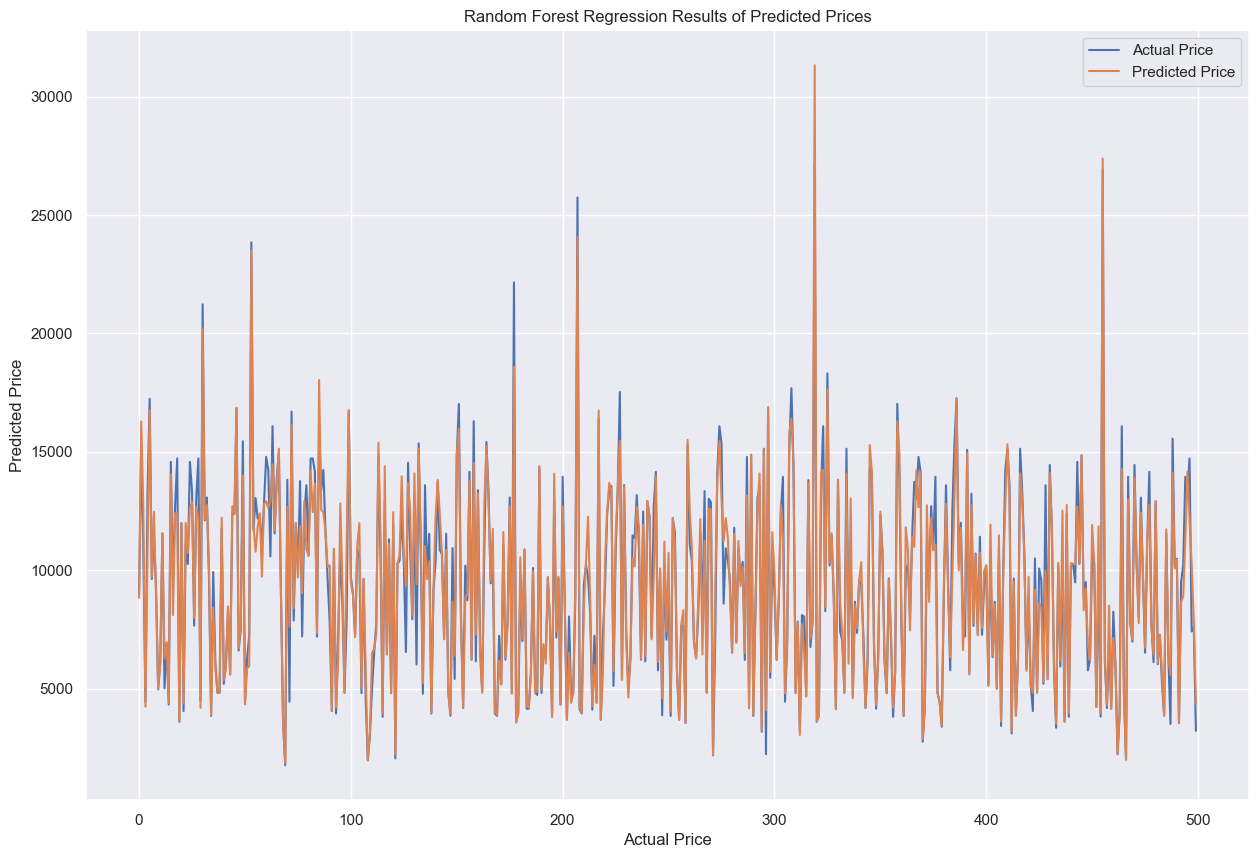

In [108]:
# plot model results
plt.figure(figsize=(15, 10))
plt.title('Random Forest Regression Results of Predicted Prices')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.plot(Y_val_[:500], label='Actual Price')
plt.plot(y_pred[:500], label='Predicted Price')
plt.legend()